# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este projeto visa explorar e entender padrões, variáveis e influências que impactam a renda de indivíduos em uma determinada população. A renda é uma variável crítica que afeta diretamente a qualidade de vida e as oportunidades disponíveis para as pessoas, e compreendê-la pode fornecer insights valiosos para a formulação de políticas, tomadas de decisão empresariais e desenvolvimento econômico.

Neste contexto, utilizaremos técnicas avançadas de Ciência de Dados, incluindo mineração de dados, análise exploratória, modelagem estatística e aprendizado de máquina para extrair informações valiosas de conjuntos de dados abrangentes. Ao coletar, limpar e processar os dados pertinentes, nosso objetivo é identificar correlações e padrões significativos entre variáveis como educação, ocupação, localização geográfica, idade e outros fatores socioeconômicos, a fim de construir modelos de previsão de renda robustos e precisos.

A análise de previsão de renda é crucial para ajudar governos, organizações não governamentais e empresas a entenderem as dinâmicas do mercado de trabalho, criar estratégias de investimento e formular políticas que promovam a equidade e a inclusão social. Ao final deste projeto, esperamos contribuir para uma compreensão mais aprofundada dos fatores que influenciam a renda, permitindo a criação de soluções mais eficazes para melhorar a distribuição de renda e a qualidade de vida da população-alvo.


## Etapa 2 Crisp-DM: Entendimento dos dados
Vamos compreender a natureza dos dados disponíveis e identificar possíveis problemas ou questões relevantes para a análise.

### Dicionário de dados

| Variável              |              Descrição              |   Tipo |
|-----------------------|:-----------------------------------:|-------:|
| data_ref              |         Data de referência          |   date |
| id_cliente            |            Id do cliente            |    int |
| sexo                  |           Sexo do cliente           | string |
| posse_de_veiculo      |           Possui veículo?           |   bool |
| posse_de_imovel       |           Possui imóvel?            |   bool |
| qtd_filhos            |        Quantidade de filhos         |    int |
| tipo_renda            |            Tipo de renda            | string |
| educacao              |            Escolaridade             | string |
| estado_civil          |            Estado civil             | string |
| tipo_residencia       |         Tipo de residêncioa         | string |
| idade                 |          Idade do cliente           |    int |
| tempo_emprego         |          Tempo de emprego           |  float |
| qt_pessoas_residencia | Quantas pessoas moram na residência |    int |
| renda                 |           Valor da renda            |  float |

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

from ydata_profiling import ProfileReport

%matplotlib inline
sns.set(context='talk', style='ticks')

C:\Users\ricme\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\ricme\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


#### Carregando os dados

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv', na_values='')

In [3]:
renda.head(1)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   

   qtd_filhos  tipo_renda    educacao estado_civil tipo_residencia  idade  \
0           0  Empresário  Secundário     Solteiro            Casa     26   

   tempo_emprego  qt_pessoas_residencia    renda  
0        6.60274                    1.0  8060.34

#### Entendimento dos dados - Univariada
Vamos avaliar a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- O dataset possui duas colunas que não servem para a análise e serão excluídas:
  - Unnamed: 0
  - id_cliente
- A variável tempo_emprego possui valores ausentes (17%) que devem ser tratados
- A variável qtd_filhos possui outliers bem afastados da média
- 69% dos clientes possuem 0 filhos
- 60% dos clientes não possuem veículos
- 67% dos clientes possuem imóvel
- 47% dos clientes são assalariados
- 42% dos clientes possuem o nível secundário de escolaridade
- 70% são casados
- A idade dos clientes varia entre 22 e 68 anos
- 54% dos clientes possuem 2 pessoas morando na residência


### Entendimento dos dados - Bivariadas




Vamos verificar a relação entre as variáveis preditoras e a variável target

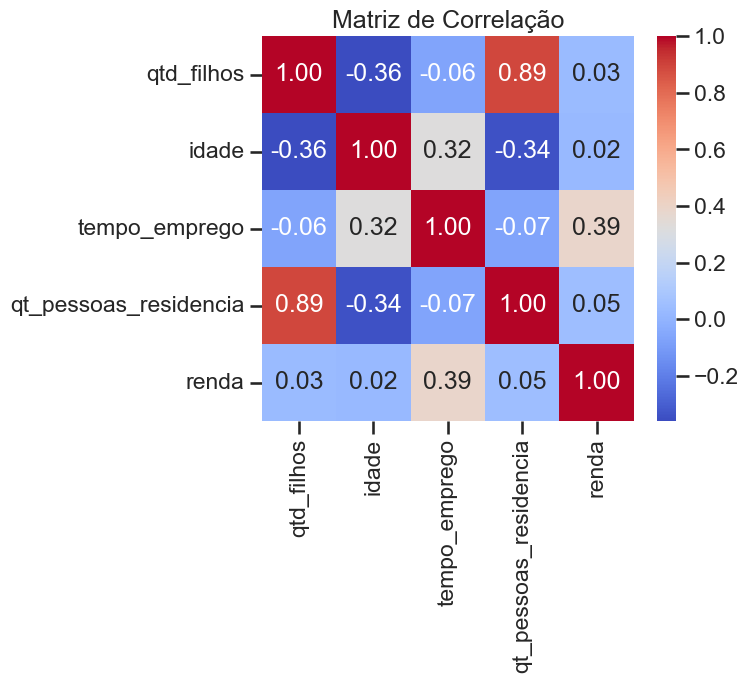

In [6]:
# Calculando a matriz de correlação
matriz_correlacao = renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr(numeric_only=True)

# Criando um mapa de calor para a matriz de correlação
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

- No estado atual do dataset a variável tempo_emprego é a que mais está conrrelacionada com a variável renda

### Vamos verificar o comportamento de algumas variáveis específicas em relação a renda

In [7]:
# Verificando as variáveis em relação a média da renda

renda_por_genero = renda.groupby('sexo')['renda'].mean().round(2)
print('Renda média por sexo:\n', renda_por_genero)
print('\n')

renda_possui_veiculo = renda.groupby('posse_de_veiculo')['renda'].mean().round(2)
print('Renda média por posse de veículol:\n', renda_possui_veiculo)
print('\n')

renda_possui_imovel = renda.groupby('posse_de_imovel')['renda'].mean().round(2)
print('Renda média por posse de imóvel:\n', renda_possui_imovel)
print('\n')

renda_tipo_renda = renda.groupby('tipo_renda')['renda'].mean().round(2)
print('Renda média por tipo de renda:\n', renda_tipo_renda)
print('\n')

renda_tipo_educacao = renda.groupby('educacao')['renda'].mean().round(2)
print('Renda média por nível de educação:\n', renda_tipo_educacao)
print('\n')

renda_estado_civil = renda.groupby('estado_civil')['renda'].mean().round(2)
print('Renda média por estado civil:\n', renda_estado_civil)
print('\n')

renda_tipo_residencia = renda.groupby('tipo_residencia')['renda'].mean().round(2)
print('Renda média por tipo de redidência:\n', renda_tipo_residencia)
print('\n')

Renda média por sexo:
 sexo
F    4060.58
M    9090.40
Name: renda, dtype: float64


Renda média por posse de veículol:
 posse_de_veiculo
False    5032.12
True     6734.77
Name: renda, dtype: float64


Renda média por posse de imóvel:
 posse_de_imovel
False    5650.94
True     5719.48
Name: renda, dtype: float64


Renda média por tipo de renda:
 tipo_renda
Assalariado         6043.21
Bolsista            4924.91
Empresário          5886.05
Pensionista         3670.40
Servidor público    7225.50
Name: renda, dtype: float64


Renda média por nível de educação:
 educacao
Primário               4633.43
Pós graduação          3958.12
Secundário             5538.50
Superior completo      6098.94
Superior incompleto    4816.95
Name: renda, dtype: float64


Renda média por estado civil:
 estado_civil
Casado      6032.82
Separado    5322.40
Solteiro    5147.47
União       4888.23
Viúvo       3806.72
Name: renda, dtype: float64


Renda média por tipo de redidência:
 tipo_residencia
Aluguel        

- Para este dataset podemos inferir que possuem renda maior:
  - pessoas do sexo masculino 
  - pessoas que possuem veículo, 
  - pessoas que imóvel
  - servidor público
  - com nível superior completo
  - casados

Visualizando graficamente

In [8]:
# Agrupando por cada variável e calculando a média da renda
grouped_data = (renda.groupby(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
                               'educacao', 'estado_civil', 'tipo_residencia'])
                     .agg({'renda': 'mean'})
                     .reset_index())

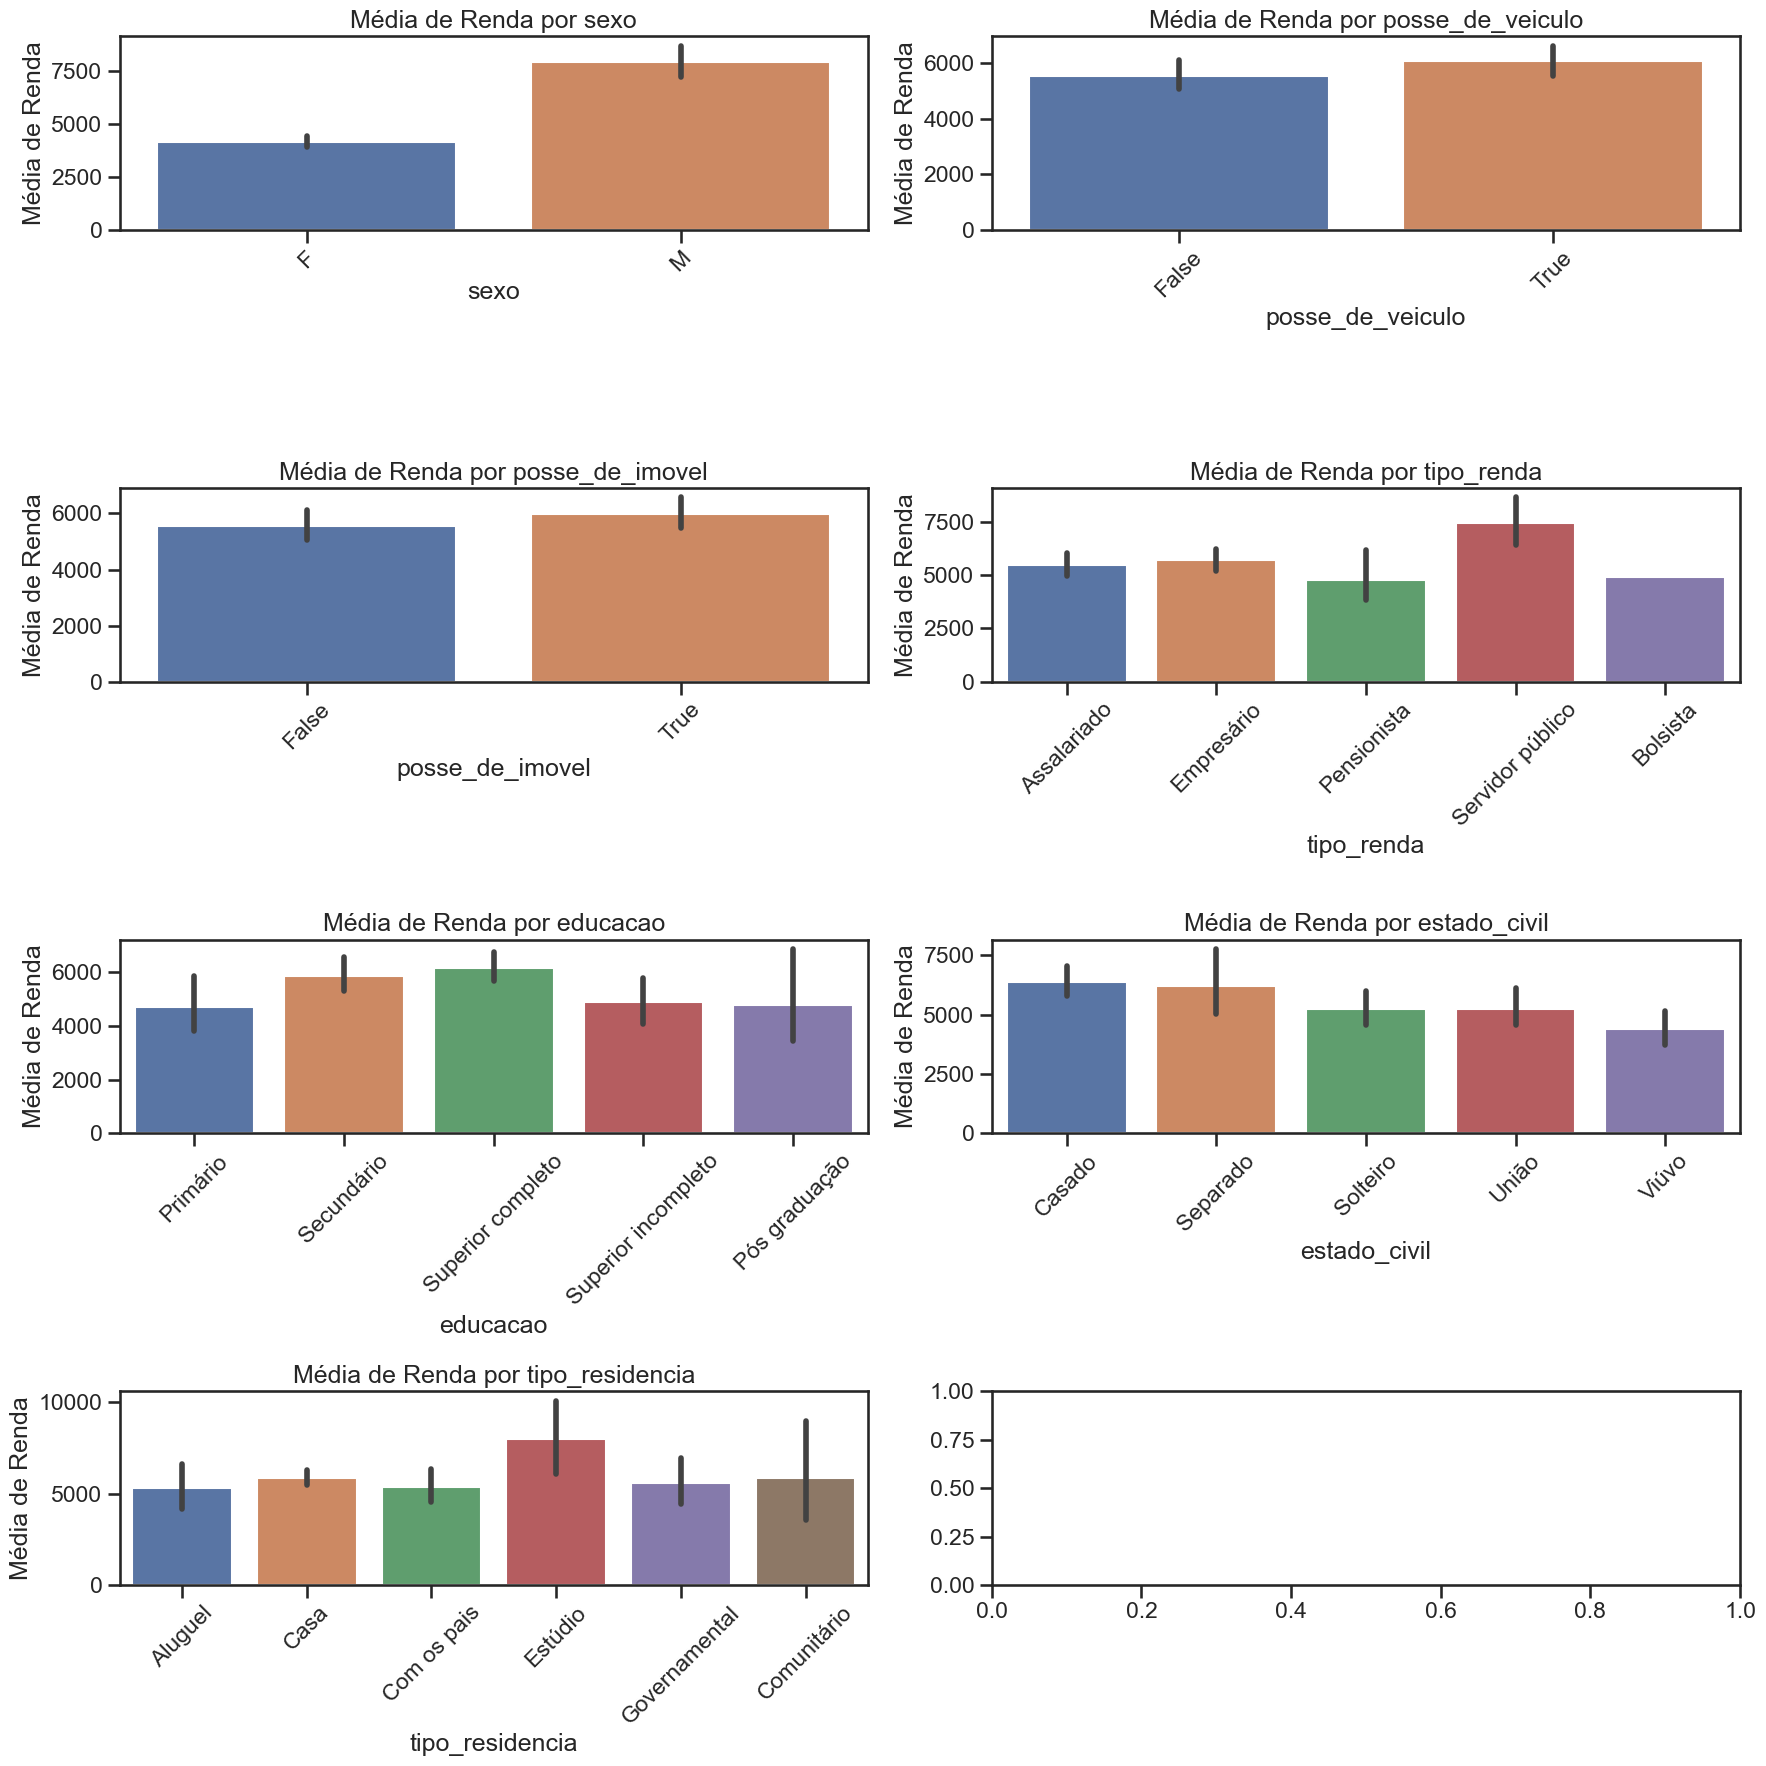

In [9]:
# Configurando a área de plotagem
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))

x = 0
for i in range(4):
    for j in range(2):
        var = grouped_data.columns[x]
        sns.barplot(x=var, y='renda', data=grouped_data, ax=axes[i][j])
        axes[i][j].set_title('Média de Renda por {}'.format(var))
        axes[i][j].set_xlabel(var)
        axes[i][j].set_ylabel('Média de Renda')
        axes[i][j].tick_params(axis='x', rotation = 45)
        x += 1
        if x == 7:
            break

plt.tight_layout()
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção dos dados**




In [10]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

As variáveis 'Unnamed: 0'  e 'id_cliente' serão removidas pois não relevantes para a análise  

In [11]:
renda.drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref'], inplace=True)
renda.head(1)

sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_renda    educacao  \
0    F             False             True           0  Empresário  Secundário   

  estado_civil tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia  \
0     Solteiro            Casa     26        6.60274                    1.0   

     renda  
0  8060.34

Vamos converter as colunas para os tipo corretos

In [12]:
renda[['idade', 'qt_pessoas_residencia']] = renda[['idade', 'qt_pessoas_residencia']].astype(int)
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int32  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  int32  
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(2), int32(2), int64(1), object(5)
memory usage: 1.1+ MB


- **limpeza dos dados**

Verificando Outliers

<Axes: >

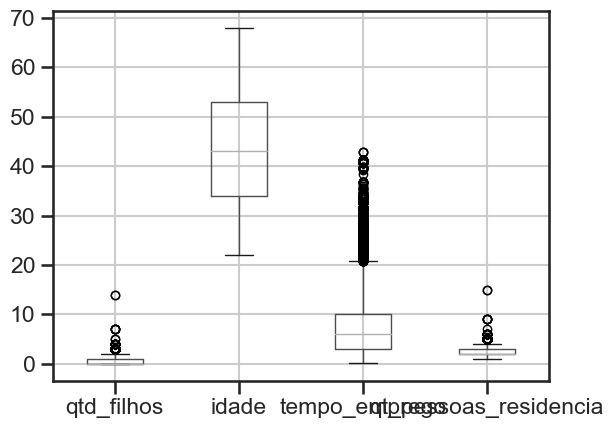

In [13]:
renda.boxplot(column=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia' ])

Tratando valores nulos

- qtd_filhos, tempo_emprego e qt_pessoas_residencia possuem outliers

<Axes: >

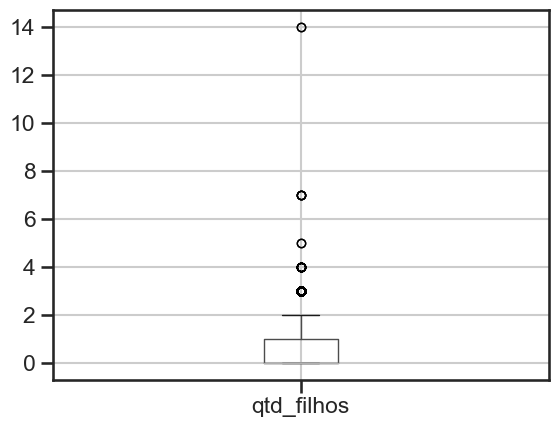

In [14]:
renda.boxplot(column=['qtd_filhos'])

In [15]:
# vamos elimiar o valores maiores que 5 do data set
renda = renda[renda['qtd_filhos'] < 5]
renda.shape

(14991, 12)

Reduzimos o dataset de 15000 para 14993

<Axes: >

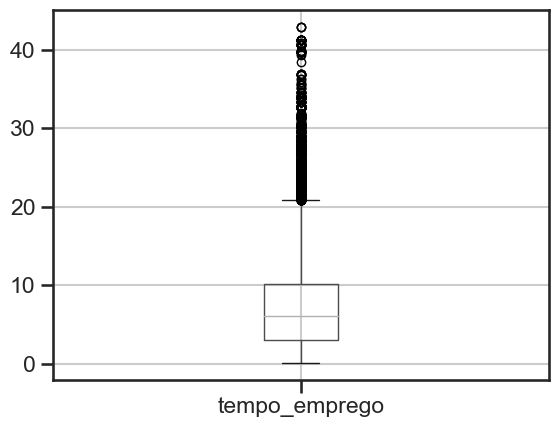

In [16]:
renda.boxplot(column=['tempo_emprego'])

In [17]:
# vamos eliminar os valores que estejam 3 desvios-padrão acima
renda = renda[ renda['tempo_emprego'] < renda['tempo_emprego'].std() * 3 ]
renda.shape

(11651, 12)

 Reduzimos o dataset para 11653
 
 Com esse corte também eliminamos os valores NaN da coluna tempo_emprego.

In [18]:
# Identificando valores nulos
renda.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

<Axes: >

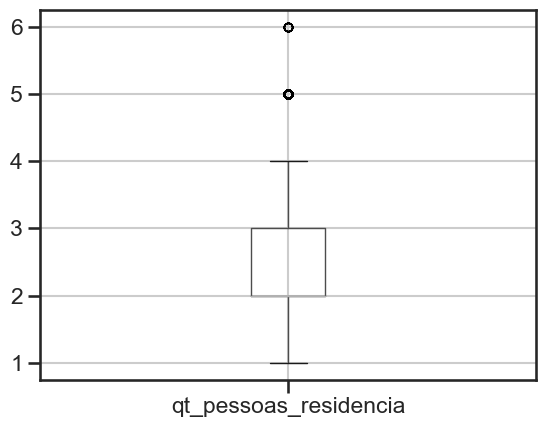

In [19]:
renda.boxplot(column=['qt_pessoas_residencia'])

<Axes: >

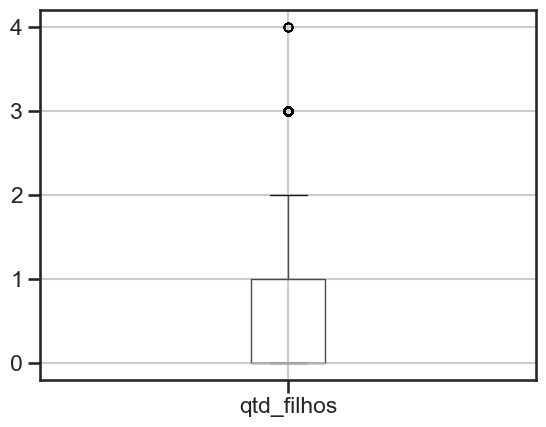

In [20]:
renda.boxplot(column=['qtd_filhos'])

<Axes: >

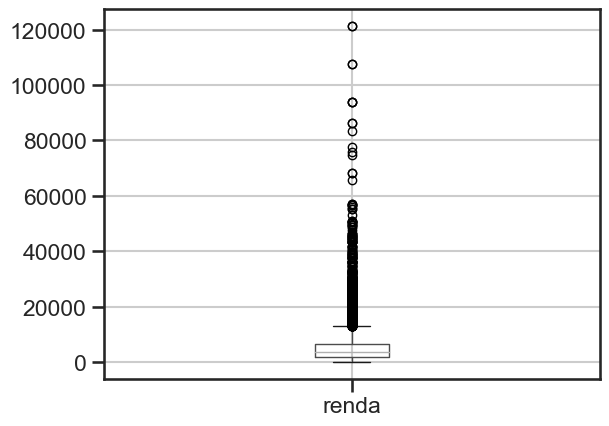

In [21]:
renda.boxplot(column=['renda'])

In [22]:
# vamos eliminar os valores que estejam 3 desvios-padrão acima
renda = renda[ renda['renda'] < renda['renda'].std() * 3 ]

<Axes: >

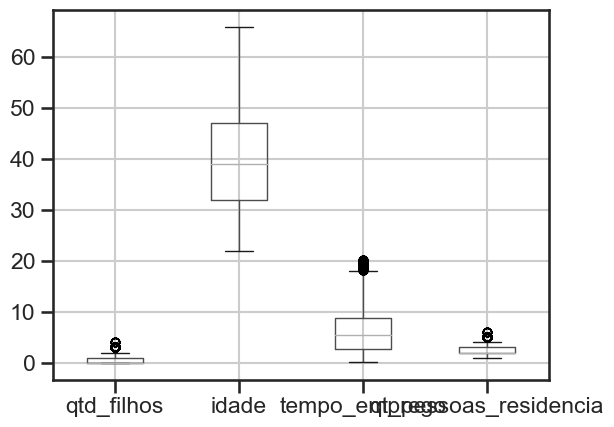

In [23]:
renda.boxplot(column=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia' ])

<Axes: >

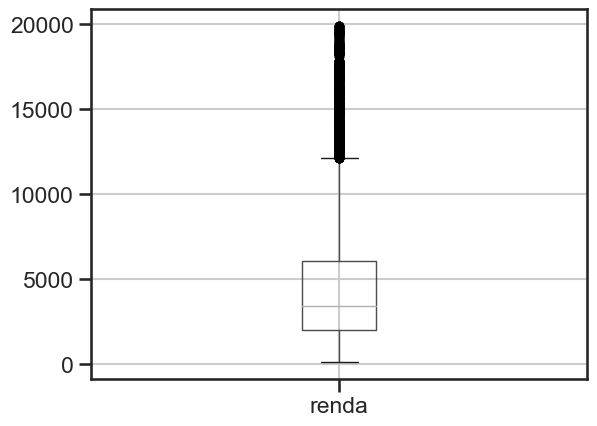

In [24]:
renda.boxplot(column=['renda'])

In [25]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11290 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   11290 non-null  object 
 1   posse_de_veiculo       11290 non-null  bool   
 2   posse_de_imovel        11290 non-null  bool   
 3   qtd_filhos             11290 non-null  int64  
 4   tipo_renda             11290 non-null  object 
 5   educacao               11290 non-null  object 
 6   estado_civil           11290 non-null  object 
 7   tipo_residencia        11290 non-null  object 
 8   idade                  11290 non-null  int32  
 9   tempo_emprego          11290 non-null  float64
 10  qt_pessoas_residencia  11290 non-null  int32  
 11  renda                  11290 non-null  float64
dtypes: bool(2), float64(2), int32(2), int64(1), object(5)
memory usage: 904.1+ KB


Vamos criar variáveis dummies para as variáveis categóricas

In [26]:
renda_final = pd.get_dummies(renda,
                             columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
                                      'educacao', 'estado_civil','tipo_residencia'],
                             drop_first=True, 
                             dtype='int')

renda_final = renda_final.reset_index()
renda_final.drop(columns='index', inplace=True)

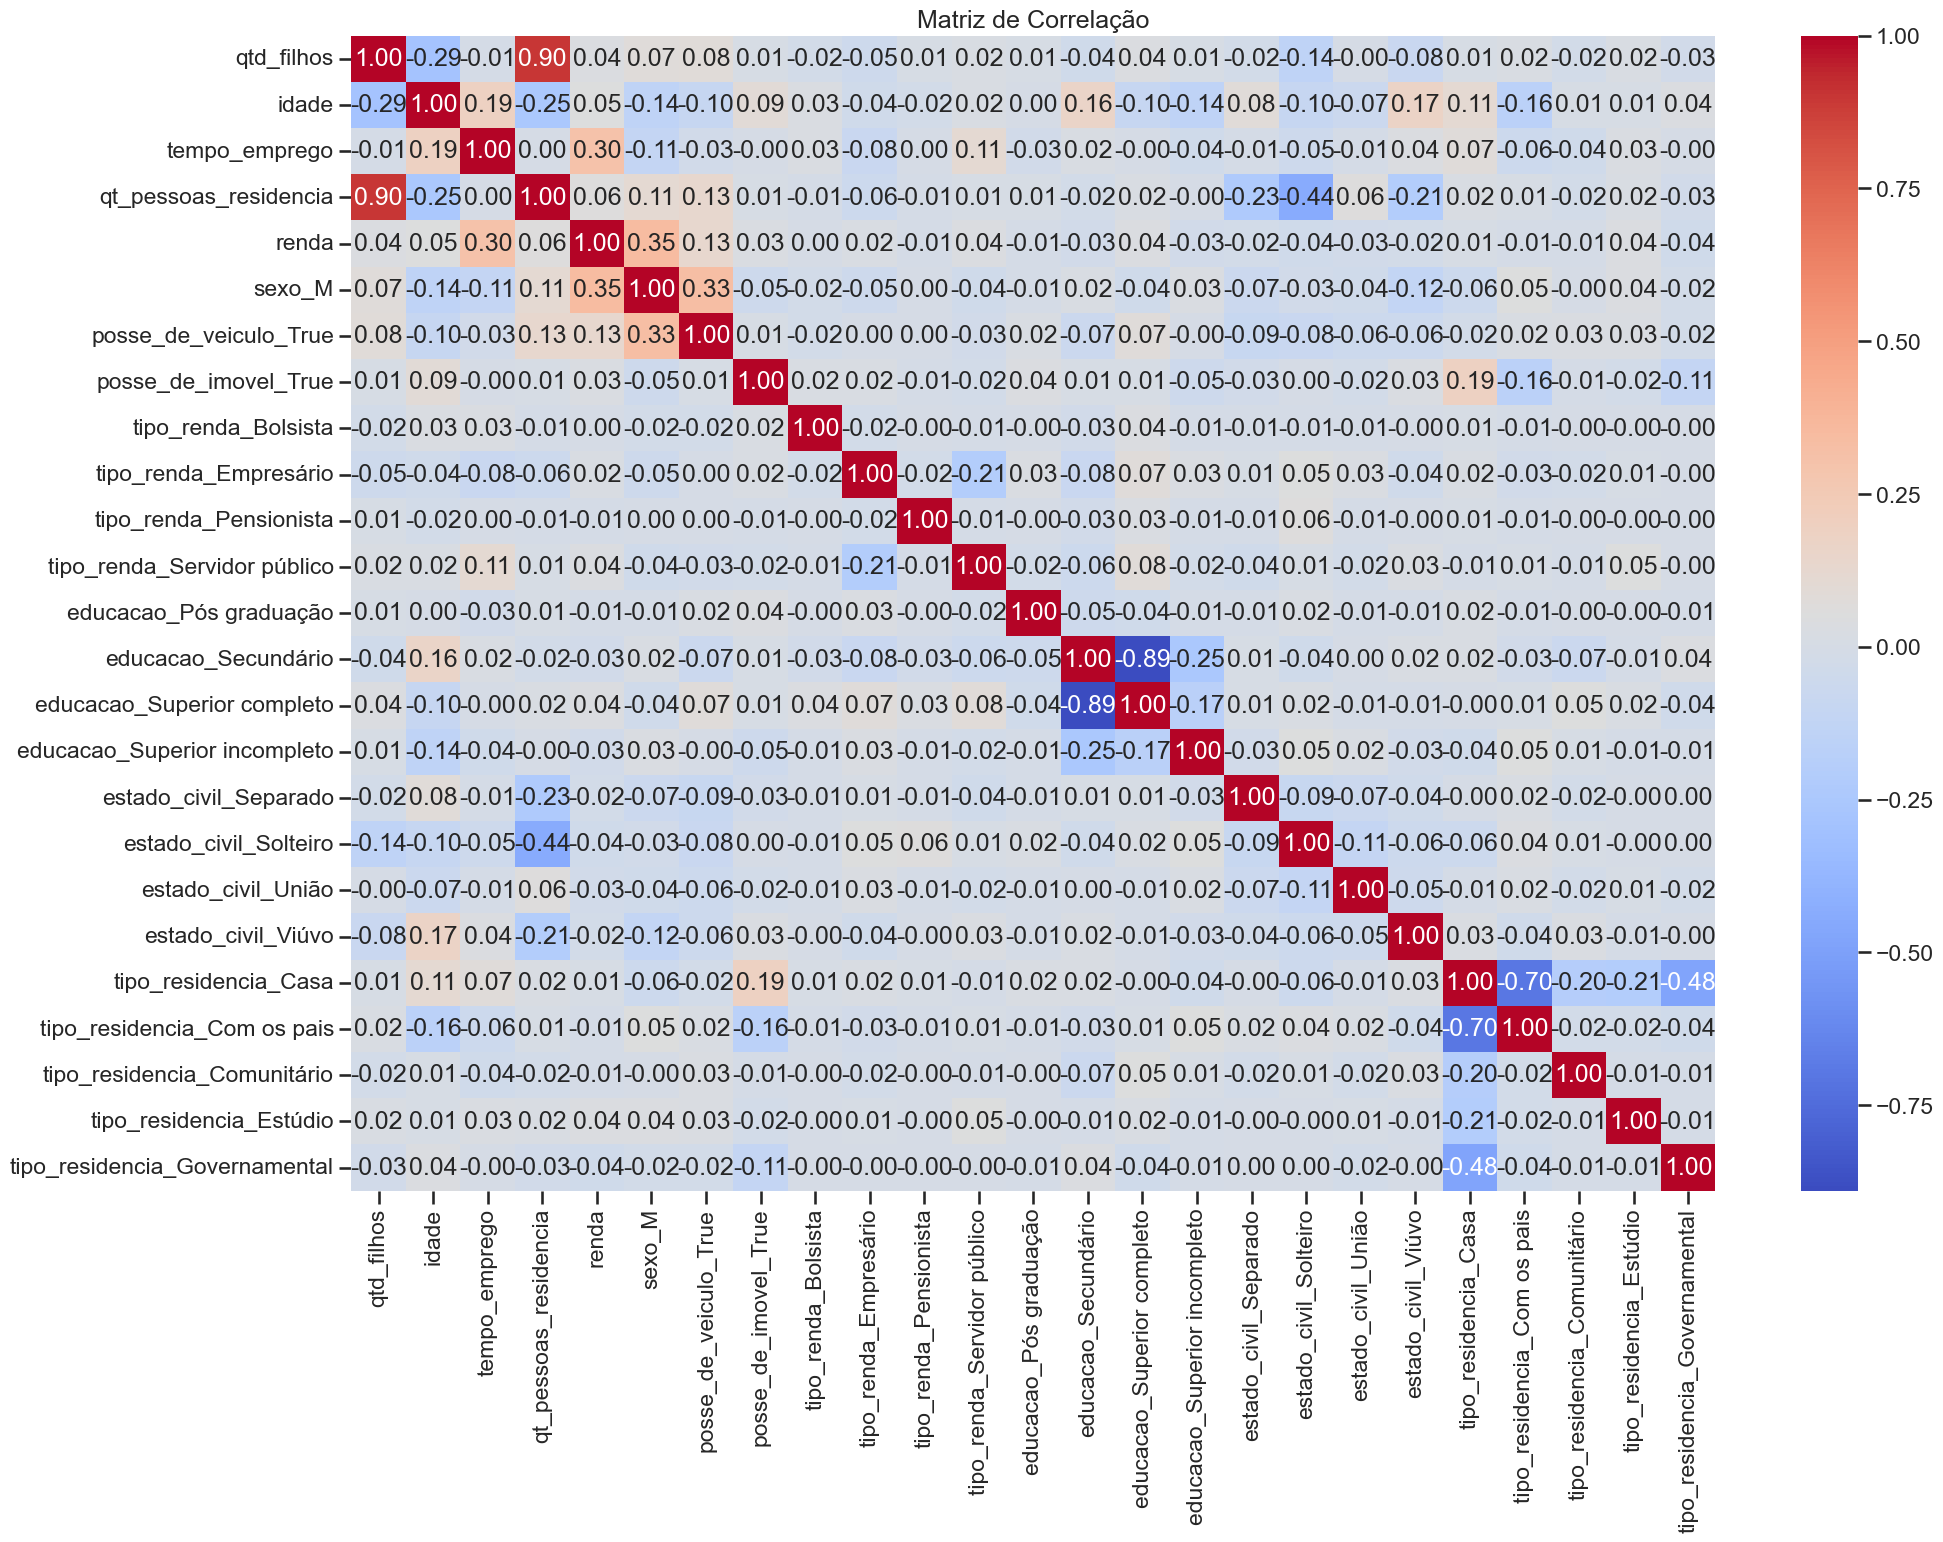

In [27]:
# Calculando a matriz de correlação
matriz_correlacao = renda_final.corr(numeric_only=False)

# Criando um mapa de calor para a matriz de correlação
plt.figure(figsize=(22,15))
sns.heatmap(matriz_correlacao.round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

**Modelo de referência**
______


In [28]:
# Separando dados de teste e treino
X = renda_final.drop('renda', axis=1)  # Variáveis preditoras
y = renda_final['renda']  # Variável de resposta

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

- Regressão Linear - Referência

MSE: 10927860.13
R²: 0.25


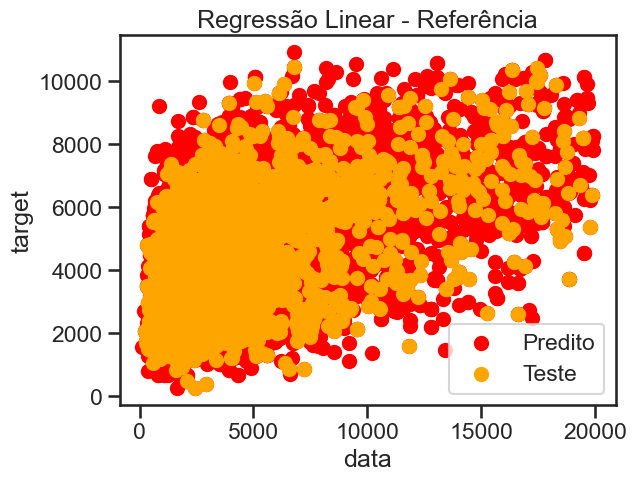

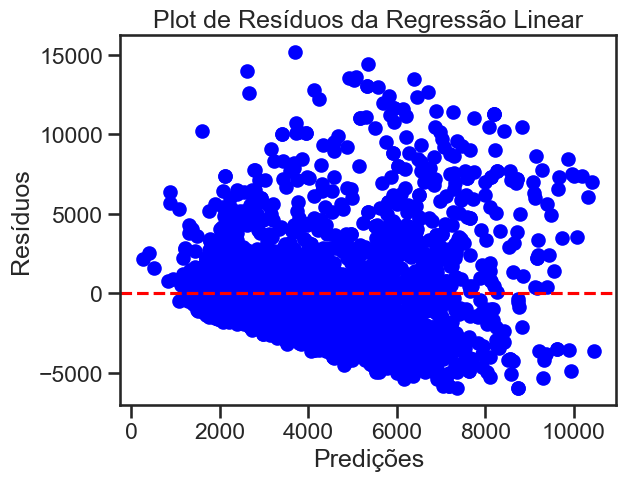

In [29]:
# Treinando o modelo de regressão linear sem normalização
reg_lin_ref = LinearRegression()
reg_lin_ref.fit(X_train, y_train)

# salvando o modelo
with open('mod_reg_ref.pkl', 'wb') as file:
    pickle.dump(reg_lin_ref, file)

# testando o modelo
y_pred_modelo = reg_lin_ref.predict(X_test)
y_train_modelo = reg_lin_ref.predict(X_train)
# avaliando o modelo
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_modelo))
print("R²: %.2f" % r2_score(y_test, y_pred_modelo))

# Plot dos resultados
y_todo_df = reg_lin_ref.predict(X)
plt.figure()
plt.scatter(y, y_todo_df, label="Predito", linewidth=2, c="red")
plt.scatter(y_test, y_pred_modelo, label="Teste", linewidth=2, c="orange")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regressão Linear - Referência")
plt.legend()
plt.show()

# Calcular os resíduos
residuos = y_test - y_pred_modelo

# Plotar os resíduos
plt.scatter(y_pred_modelo, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos da Regressão Linear')
plt.show()

- Árvore de Regressão - Referência

MSE: 10723488.47
R²: 0.26


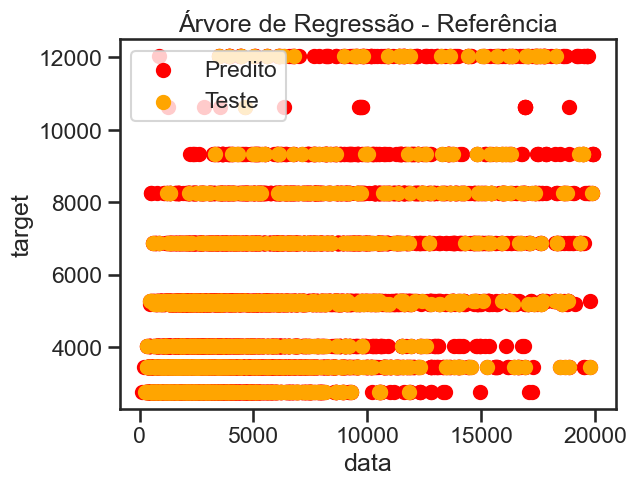

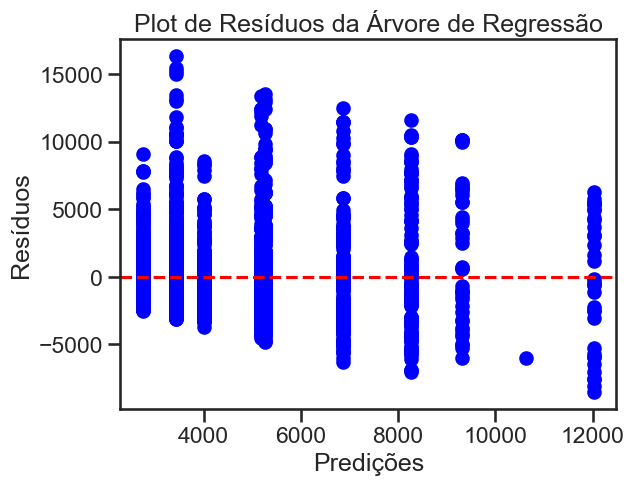

In [30]:
# Ajuste da árvore de regressão - referência
arvore_ref = DecisionTreeRegressor(max_leaf_nodes=10)
arvore_ref.fit(X_train, y_train)

# salva o modelo
with open('mod_arvore_ref.pkl', 'wb') as file:
    pickle.dump(arvore_ref, file)

y_pred_arvore = arvore_ref.predict(X_test)
arvore_mse = round(mean_squared_error(y_test, y_pred_arvore),2)
arvore_r2 = round(r2_score(y_test, y_pred_arvore),2)
print(f"MSE: {arvore_mse}")
print(f"R²: {arvore_r2}")

# Plot dos resultados
y_todo_df = arvore_ref.predict(X)
plt.figure()
plt.scatter(y, y_todo_df, label="Predito", linewidth=2, c="red")
plt.scatter(y_test, y_pred_arvore, label="Teste", linewidth=2, c="orange")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Árvore de Regressão - Referência")
plt.legend()
plt.show()

# Calcular os resíduos
residuos = y_test - y_pred_arvore

# Plotar os resíduos
plt.scatter(y_pred_arvore, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos da Árvore de Regressão')
plt.show()

- **Seleção de variáveis**
____

Vamos selecionar as melhores variáveis utilizando um método stepwise

In [31]:
X = renda_final.drop('renda', axis=1)  # Variáveis preditoras
y = renda_final['renda']  # Variável de resposta

In [32]:
# Usando RFE (recursive feature elimination) com Linear Regression
# vamos selecionar as 6 melhores variáveis

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1, verbose=1)
selector = selector.fit(X, y)

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


In [33]:
# As melhores variáveis
melhores_variaveis= list(selector.get_feature_names_out())
melhores_variaveis

['tempo_emprego',
 'sexo_M',
 'posse_de_veiculo_True',
 'posse_de_imovel_True',
 'tipo_renda_Empresário',
 'educacao_Superior completo']

In [34]:
df_melhores_variaveis = renda_final[melhores_variaveis].copy()
df_melhores_variaveis['renda'] = renda_final['renda']
df_melhores_variaveis.head(1)

tempo_emprego  sexo_M  posse_de_veiculo_True  posse_de_imovel_True  \
0        6.60274       0                      0                     1   

   tipo_renda_Empresário  educacao_Superior completo    renda  
0                      1                           0  8060.34

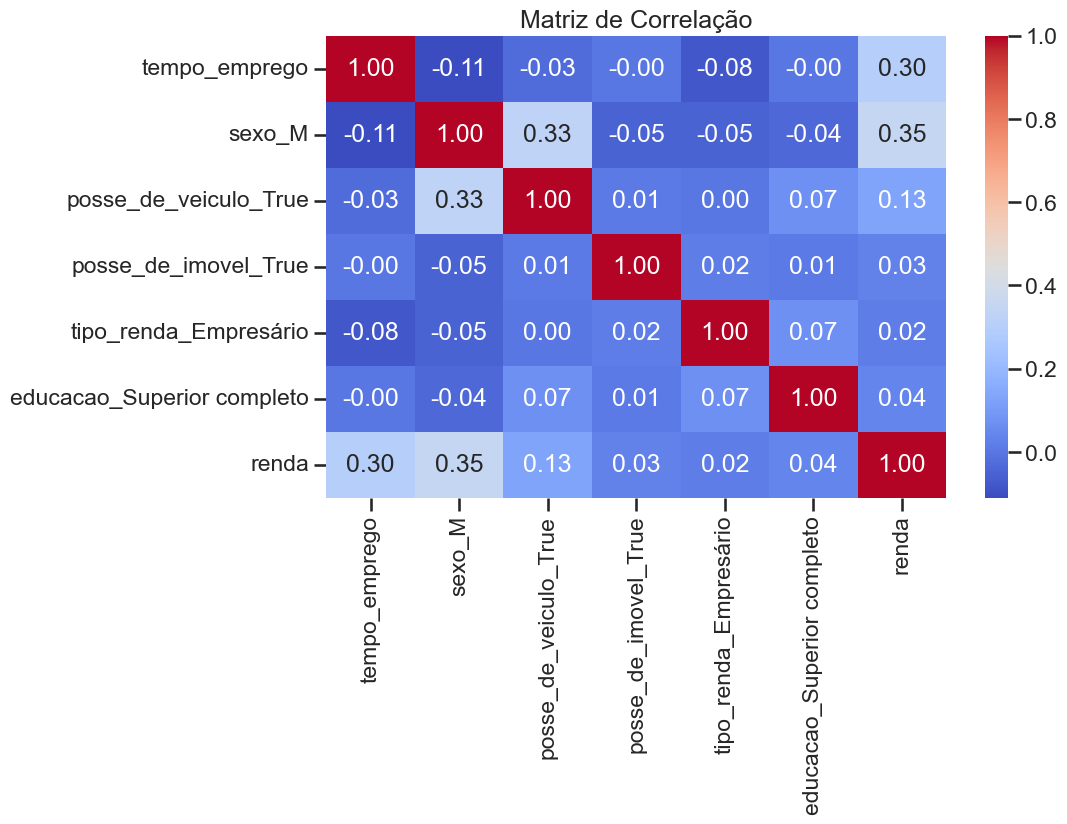

In [35]:
# Calculando a matriz de correlação
matriz_correlacao = df_melhores_variaveis.corr(numeric_only=False)

# Criando um mapa de calor para a matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacao.round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## Etapa 4 Crisp-DM: Modelagem
- Vamos utilizar a regressão linear e a árvore de regressão com e sem normalização dos dados

In [36]:
# Separando dados de teste e treino
X = df_melhores_variaveis.drop('renda', axis=1)  # Variáveis preditoras
y = df_melhores_variaveis['renda']  # Variável de resposta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

- **Modelo de Regressão sem normalização dos dados, com seleção de variáveis**

MSE: 11001757.37
R²: 0.24


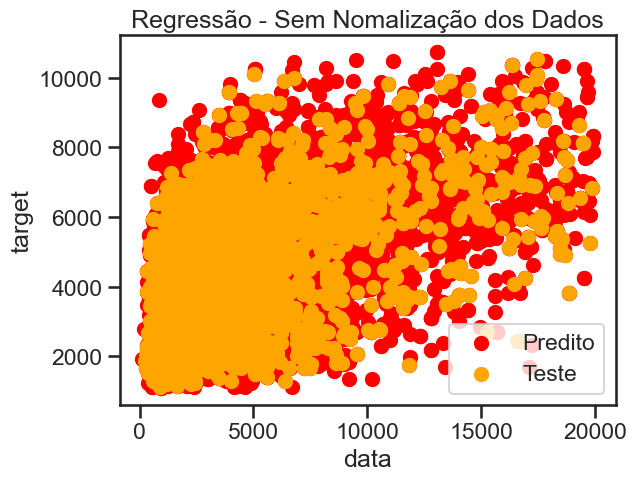

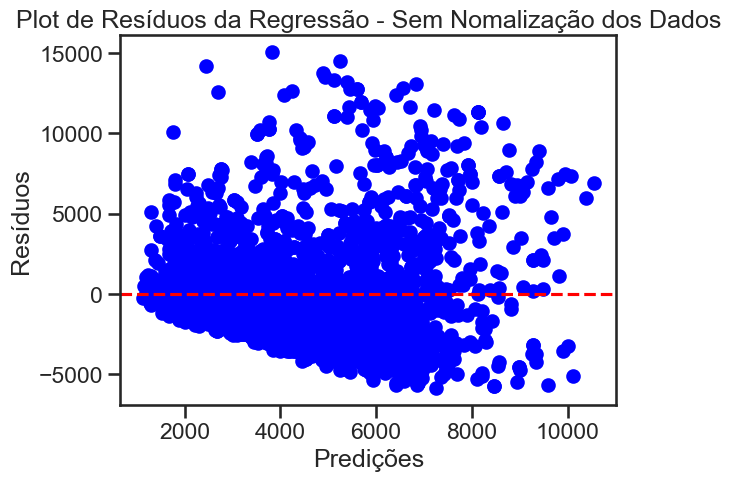

In [37]:
# Treinando o modelo de regressão linear sem normalização
reg_lin_sem_norm = LinearRegression()
reg_lin_sem_norm.fit(X_train, y_train)

# salva o modelo
with open('mod_reg_sem_norm.pkl', 'wb') as file:
    pickle.dump(reg_lin_sem_norm, file)

# testando o modelo
y_pred_modelo = reg_lin_sem_norm.predict(X_test)

# avaliando o modelo
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_modelo))
print("R²: %.2f" % r2_score(y_test, y_pred_modelo))

# Plot dos resultados
y_todo_df = reg_lin_sem_norm.predict(X)
plt.figure()
plt.scatter(y, y_todo_df, label="Predito", linewidth=2, c="red")
plt.scatter(y_test, y_pred_modelo, label="Teste", linewidth=2, c="orange")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regressão - Sem Nomalização dos Dados")
plt.legend()
plt.show()

# Calcular os resíduos
residuos = y_test - y_pred_modelo

# Plotar os resíduos
plt.scatter(y_pred_modelo, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos da Regressão - Sem Nomalização dos Dados')
plt.show()

MSE: 10723488.47
R²: 0.26


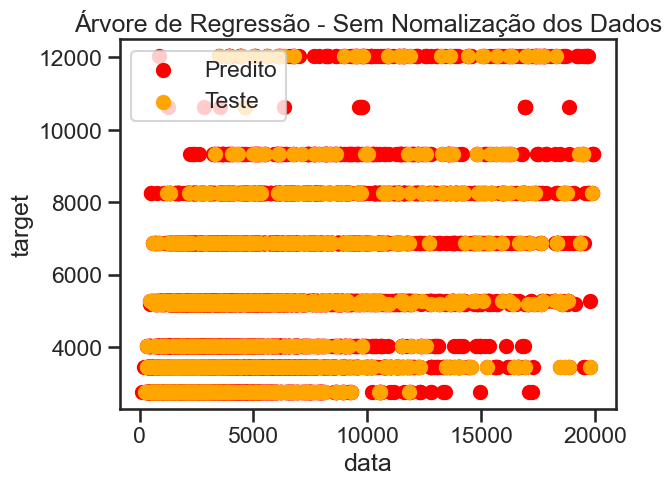

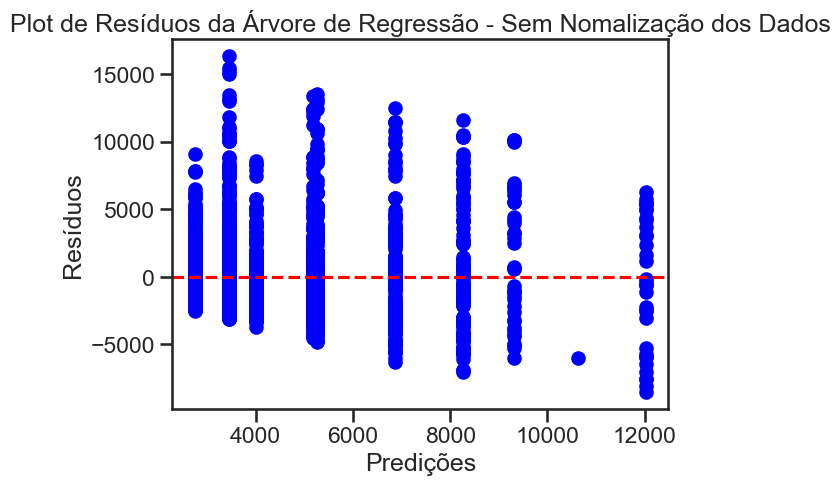

In [38]:
# Ajuste da árvore de regressão sem normalização, com seleção de variáveis

arvore_reg_sem_norm = DecisionTreeRegressor(max_leaf_nodes=10)
arvore_reg_sem_norm.fit(X_train, y_train)

# salva o modelo
with open('mod_arvore_sem_norm.pkl', 'wb') as file:
    pickle.dump(arvore_reg_sem_norm, file)

y_pred_arvore = arvore_reg_sem_norm.predict(X_test)
arvore_mse = round(mean_squared_error(y_test, y_pred_arvore), 2)
arvore_r2 = round(r2_score(y_test, y_pred_arvore), 2)

# Avaliação do Modelo
print(f"MSE: {arvore_mse}")
print(f"R²: {arvore_r2}")

# Plot dos resultados
y_todo_df = arvore_reg_sem_norm.predict(X)
plt.figure()
plt.scatter(y, y_todo_df, label="Predito", linewidth=2, c="red")
plt.scatter(y_test, y_pred_arvore, label="Teste", linewidth=2, c="orange")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Árvore de Regressão - Sem Nomalização dos Dados")
plt.legend()
plt.show()

# Calcular os resíduos
residuos = y_test - y_pred_arvore

# Plotar os resíduos
plt.scatter(y_pred_arvore, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos da Árvore de Regressão - Sem Nomalização dos Dados')
plt.show()

- **Vamos normalizar os dados e retreinar os modelos**
_____

In [39]:
# Normalizando os dados
norm = StandardScaler()
df_ajustado_norm = renda_final.copy()

df_ajustado_norm = pd.DataFrame(norm.fit_transform(df_ajustado_norm), columns=df_ajustado_norm.columns)
df_ajustado_norm.head(1)

qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia     renda  \
0   -0.683805 -1.515637       0.057918              -1.434146  0.917619   

     sexo_M  posse_de_veiculo_True  posse_de_imovel_True  tipo_renda_Bolsista  \
0 -0.753984              -0.866876               0.73016            -0.028245   

   tipo_renda_Empresário  ...  educacao_Superior incompleto  \
0               1.562378  ...                     -0.219732   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0              -0.244734               2.677559           -0.284975   

   estado_civil_Viúvo  tipo_residencia_Casa  tipo_residencia_Com os pais  \
0            -0.16522              0.354117                    -0.246154   

   tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                     -0.07186                -0.075505   

   tipo_residencia_Governamental  
0                      -0.169139  

[1 rows x 25 columns]

- Modelos com Nomalização e sem seleção de variáveis

In [40]:
# separando as variáveis preditoras da target
X = df_ajustado_norm.drop('renda', axis=1)  # Variáveis preditoras
y = df_ajustado_norm['renda']  # Variável de resposta

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1980)

# Treinando o modelo de regressão linear com normalização
reg_lin_com_norm = LinearRegression()
reg_lin_com_norm.fit(X_train, y_train)

# salva o modelo
with open('mod_reg_com_norm_todas_var.pkl', 'wb') as file:
    pickle.dump(reg_lin_sem_norm, file)

# testando o modelo
y_pred_modelo = reg_lin_com_norm.predict(X_test)

# avaliando o modelo
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_modelo))
print("R²: %.2f" % r2_score(y_test, y_pred_modelo))

MSE: 0.75
R²: 0.26


In [42]:
arvore_reg_com_norm = DecisionTreeRegressor(max_leaf_nodes=10)
arvore_reg_com_norm.fit(X_train, y_train)

# salva o modelo
with open('mod_arvore_com_norm_todas_var.pkl', 'wb') as file:
    pickle.dump(arvore_reg_com_norm, file)

y_pred_arvore = arvore_reg_com_norm.predict(X_test)
arvore_mse = round(mean_squared_error(y_test, y_pred_arvore), 2)
arvore_r2 = round(r2_score(y_test, y_pred_arvore), 2)

# Avaliação do Modelo
print(f"MSE: {arvore_mse}")
print(f"R²: {arvore_r2}")

MSE: 0.75
R²: 0.26


In [43]:
# Usando RFE (recursive feature elimination) com Linear Regression
# vamos selecionar as 6 melhores variáveis
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1, verbose=1)
selector = selector.fit(X, y)

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


In [44]:
# As melhores variáveis
melhores_variaveis= list(selector.get_feature_names_out())
melhores_variaveis

['idade',
 'tempo_emprego',
 'sexo_M',
 'posse_de_imovel_True',
 'tipo_renda_Empresário',
 'educacao_Superior completo']

C:\Users\ricme\AppData\Local\Temp\ipykernel_23164\3987831399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ajustado_norm_mel_var['renda'] = df_ajustado_norm['renda'].copy()


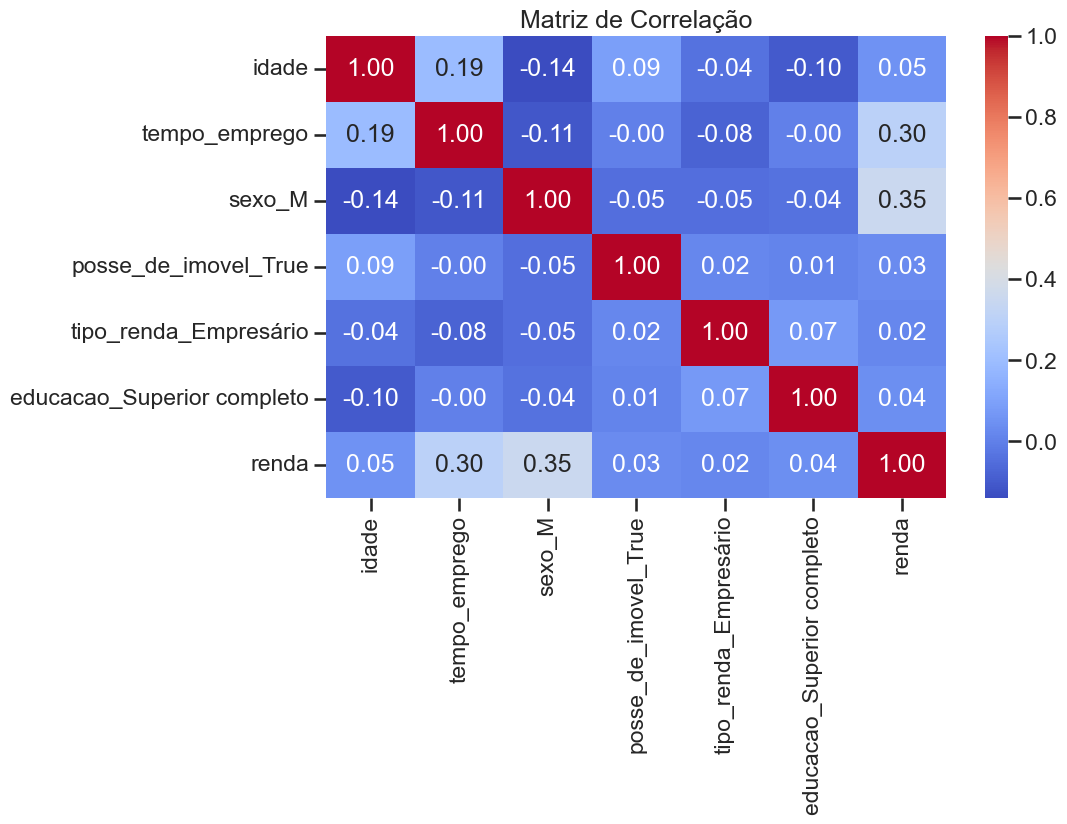

In [45]:
# Calculando a matriz de correlação
df_ajustado_norm_mel_var = df_ajustado_norm[melhores_variaveis]
df_ajustado_norm_mel_var['renda'] = df_ajustado_norm['renda'].copy()

matriz_correlacao = df_ajustado_norm_mel_var.corr(numeric_only=False)

# Criando um mapa de calor para a matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacao.round(2), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [46]:
# Separando dados de teste e treino
X = df_ajustado_norm_mel_var.drop('renda', axis=1)  # Variáveis preditoras
y = df_ajustado_norm_mel_var['renda']  # Variável de resposta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

MSE: 0.78
R²: 0.24


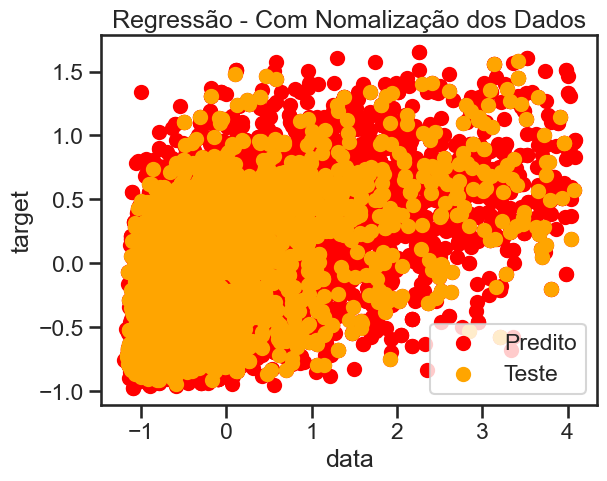

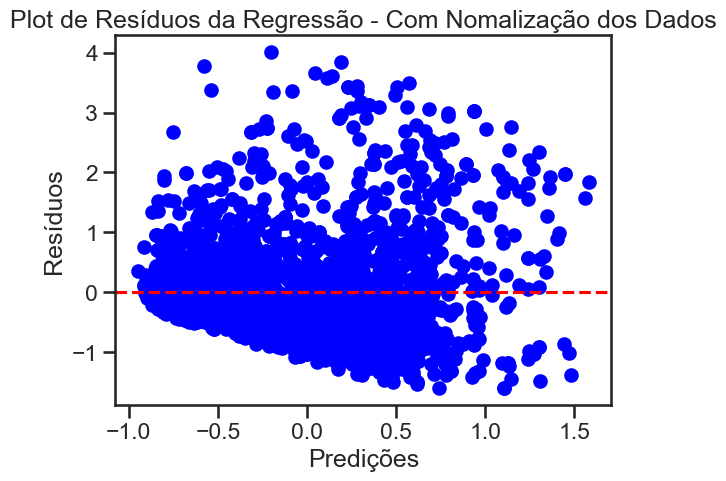

In [47]:
# Treinando o modelo de regressão linear com normalização e seleção de variáveis
reg_norm_mel_var = LinearRegression()
reg_norm_mel_var.fit(X_train, y_train)

# salva o modelo
with open('mod_reg_com_norm.pkl', 'wb') as file:
    pickle.dump(reg_norm_mel_var, file)

# testando o modelo
y_pred_modelo = reg_norm_mel_var.predict(X_test)

# avaliando o modelo
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_modelo))
print("R²: %.2f" % r2_score(y_test, y_pred_modelo))

# Plot dos resultados
y_todo_df = reg_norm_mel_var.predict(X)
plt.figure()
plt.scatter(y, y_todo_df, label="Predito", linewidth=2, c="red")
plt.scatter(y_test, y_pred_modelo, label="Teste", linewidth=2, c="orange")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regressão - Com Nomalização dos Dados")
plt.legend()
plt.show()

# Calcular os resíduos
residuos = y_test - y_pred_modelo

# Plotar os resíduos
plt.scatter(y_pred_modelo, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos da Regressão - Com Nomalização dos Dados')
plt.show()

MSE: 0.77
R²: 0.26


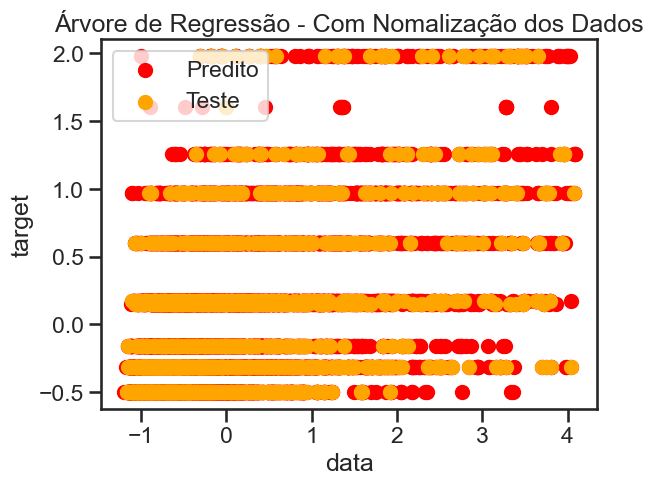

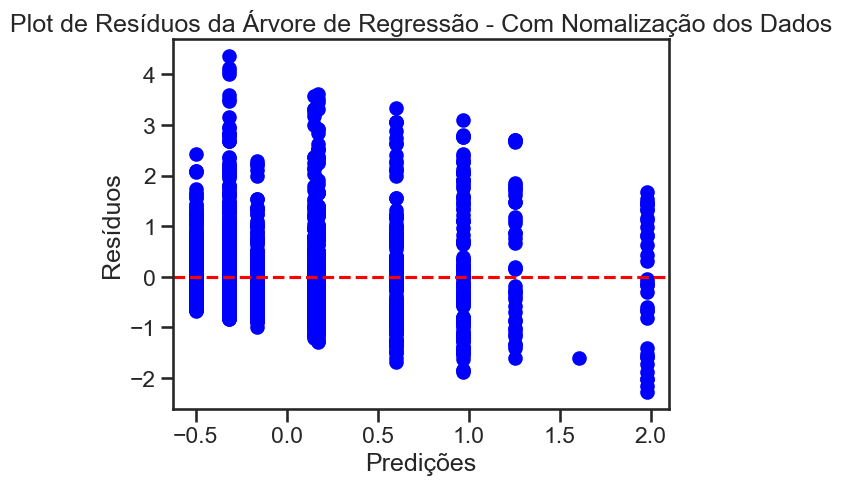

In [48]:
# Ajuste da árvore de regressão com normalização e seleção de variáveis
arvore_reg_norm_mel_var = DecisionTreeRegressor(max_leaf_nodes=10)
arvore_reg_norm_mel_var.fit(X_train, y_train)

# salva o modelo
with open('mod_arvore_com_norm.pkl', 'wb') as file:
    pickle.dump(arvore_reg_norm_mel_var, file)

y_pred_arvore = arvore_reg_norm_mel_var.predict(X_test)
arvore_mse = round(mean_squared_error(y_test, y_pred_arvore), 2)
arvore_r2 = round(r2_score(y_test, y_pred_arvore), 2)

# avaliação do modelo
print(f"MSE: {arvore_mse}")
print(f"R²: {arvore_r2}")

# Plot dos resultados
y_todo_df = arvore_reg_norm_mel_var.predict(X)
plt.figure()
plt.scatter(y, y_todo_df, label="Predito", linewidth=2, c="red")
plt.scatter(y_test, y_pred_arvore, label="Teste", linewidth=2, c="orange")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Árvore de Regressão - Com Nomalização dos Dados")
plt.legend()
plt.show()

# Calcular os resíduos
residuos = y_test - y_pred_arvore

# Plotar os resíduos
plt.scatter(y_pred_arvore, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Plot de Resíduos da Árvore de Regressão - Com Nomalização dos Dados')
plt.show()

- Vamos remover a variável tipo_renda_Empresario, posse_imovel_True e educacao_SuperiorCompleto pois elas se mantem praticamente sem correlação com a renda

In [49]:
# drop da colune e divisão dos dados em treino e teste
df_renda_norm_2 = df_ajustado_norm_mel_var[['idade', 'tempo_emprego', 'sexo_M',
                                            'educacao_Superior completo', 'renda']].copy()

X = df_renda_norm_2.drop(['renda'], axis=1)  # Variáveis preditoras
y = df_renda_norm_2['renda']  # Variável de resposta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [50]:
# Treinando o modelo de regressão linear
reg_norm_2 = LinearRegression()
reg_norm_2.fit(X_train, y_train)

# testando o modelo
y_pred_modelo = reg_norm_2.predict(X_test)

print("MSE: %.2f" % mean_squared_error(y_test, y_pred_modelo))
print("R²: %.2f" % r2_score(y_test, y_pred_modelo))

MSE: 0.79
R²: 0.24


In [51]:
# Ajuste da árvore de regressão 

arvore_reg = DecisionTreeRegressor(max_leaf_nodes=10)
arvore_reg.fit(X_train, y_train)

y_pred_arvore = arvore_reg.predict(X_test)
arvore_mse = round(mean_squared_error(y_test, y_pred_arvore), 2)
arvore_r2 = round(r2_score(y_test, y_pred_arvore), 2)



print(f"MSE: {arvore_mse}")
print(f"R²: {arvore_r2}")

MSE: 0.77
R²: 0.26


## Etapa 5 Crisp-DM: Avaliação dos resultados


- Avaliação dos modelos **sem** normalização dos dados:
  - Regressão Linear: 
    - MSE: 49472145.83 
    - R²: 0.26
  - Árvore de Regressão:
    - MSE: 39189938.52
    - R²: 0.41

_____

- Avaliação dos modelos **com** normalização dos dados:
  - Regressão Linear:
    - MSE: 0.90
    - R²: 0.26
  - Árvore de Regressão:
    - MSE: 0.68
    - R²: 0.43

_____

- Avaliação dos modelos **com** normalização dos dados e excluindo as variáveis tipo_renda_Empresario, posse_imovel_True e educacao_SuperiorCompleto:
  - Regressão Linear:
    - MSE: 0.91
    - R²: 0.25
  - Árvore de Regressão:
    - MSE: 0.72
    - R²: 0.41

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.